## Нелинейные уравнения

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def derivative(func, x, h):
    return (func(x + h) - func(x)) / h

def func(x):
    return 2.0 * math.log10(x) - x / 2.0 + 1

def newton(x):
    return x - func(x)/derivative(func, x, 1e-4)

def mpi(x):
    return 4.0 * math.log10(x) + 2.0

In [3]:
def plot(title):
    plt.grid()
    plt.title(title)
    plt.ylabel("X")
    plt.xlabel("Step")
    plt.plot(xs, '.-', ms = 5.0)
    plt.show()

In [4]:
def simple_sycle(operation, start_value):
    xs = []
    x1 = start_value
    x = start_value + 1 #usefull value to start iteration
    while abs(x1 - x) > 1e-6:
        print(x1)
        x = x1
        xs.append(x)
        x1 = operation(x)
    print("res: ", x1)
    return xs

MPI:
10
6.0
5.1126050015345745
4.834568962198533
4.737431038239938
4.702171604364807
4.689193898108275
4.684392764725867
4.682613206064106
4.681953142416248
4.681708251631323
4.681617385708595
4.681583668996936
4.681571157906563
4.681566515456353
4.681564792794076
res:  4.681564153569699


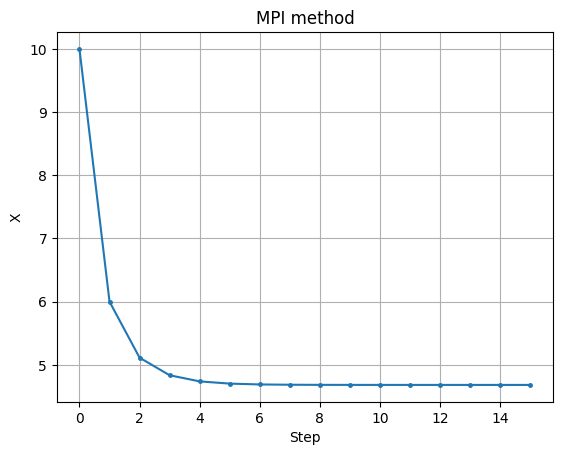

Newton:
10
5.159044016439127
4.693527512992002
4.681572826203632
4.681563776491678
res:  4.681563776429494


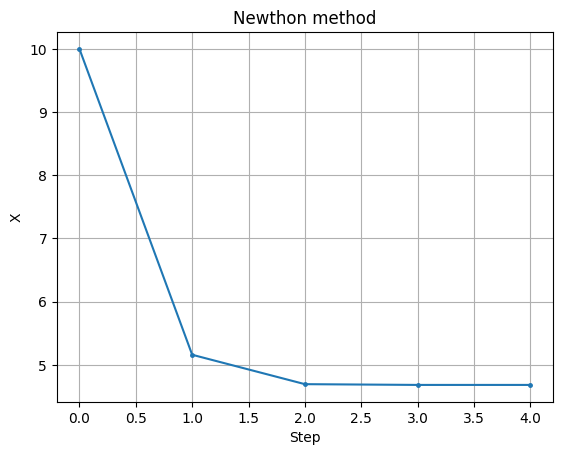

In [5]:
print("MPI: ")
xs = simple_sycle(mpi, 10)
plot("MPI method")

print("Newton:")
xs = simple_sycle(newton, 10)
plot("Newthon method")

## Нелинейные системы

In [6]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [7]:
def F(x, y):
    return [math.sin(x + 1) - y - 1.2, 2*x + math.cos(y) - 2]

def mpi_get_x(x, y):
    return (2 - math.cos(y)) / 2

def mpi_get_y(x, y):
    return math.sin(x + 1) - 1.2

def J(x, y):
    matrix = np.zeros((2, 2))
    matrix[0][0] = math.cos(x + 1)
    matrix[0][1] = -1
    matrix[1][0] = 2
    matrix[1][1] = -math.sin(y)
    return matrix

In [8]:
def plot(title, x, y):
    plt.grid()

    plt.title(title)
    plt.xlabel("X")
    plt.ylabel("Y")

    plt.plot(x, y, '.-', ms=8.0)
    plt.show()

In [9]:
def mpi_sycle(x, y):
    return mpi_get_x(x, y), mpi_get_y(x, y)

def newton_sycle(x, y):
    dF = J(x, y)
    x1 = x - (np.linalg.inv(dF) @ F(x, y))[0]
    y1 = y - (np.linalg.inv(dF) @ F(x, y))[1]
    return x1, y1

def simple_sycle(operation, start_values):
    x1 = start_values[0]
    y1 = start_values[1]
    x = x1 + 1
    y = y1 + 1
    xs = []
    ys = []
    while (abs(x1 - x) > 1e-3) and (abs(y1 - y) > 1e-3):
        x = x1
        y = y1
        xs.append(x)
        ys.append(y)
        x1, y1 = operation(x, y)
    print("res: ", x1, y1)
    return xs, ys

MPI:
res:  0.5101249695911679 -0.20136860065411577


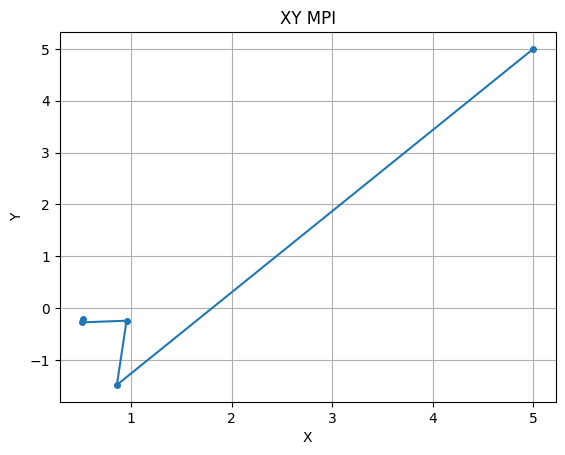

Newton:
res:  0.5101501565519757 -0.20183840646139262


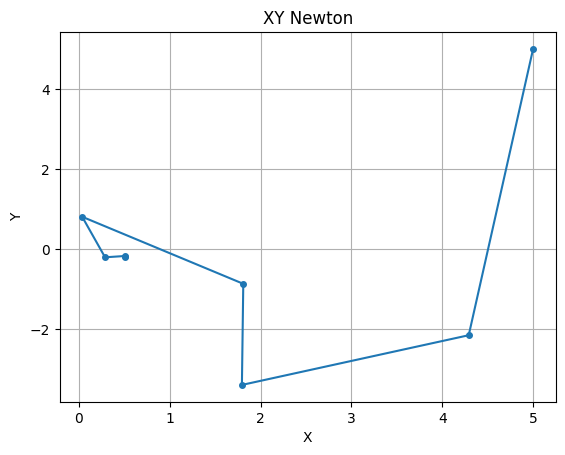

In [10]:
print("MPI:")
xs, ys = simple_sycle(mpi_sycle, [5, 5])
plot("XY MPI", xs, ys)

print("Newton:")
xs, ys = simple_sycle(newton_sycle, [5, 5])   
plot("XY Newton", xs, ys)